In [2]:
#PI-211, Turevskyi D.V., Variant: 5 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Параметри
n = 5001
mean = [0, 1]
R = np.array([[1, -0.9], [-0.9, 2]])

# Генерація даних
data = np.random.multivariate_normal(mean, R, n)
x, y = data[:, 0], data[:, 1]

df = pd.DataFrame({'x': x, 'y': y})

# Збереження в Excel
excel_filename = 'generated_data.xlsx'
df.to_excel(excel_filename, index=False)
df.head()

,x,y
0,1.374203,-0.768776
1,0.366703,0.045998
2,0.405916,1.615269
3,-0.244385,3.862691
4,-1.307768,1.338851


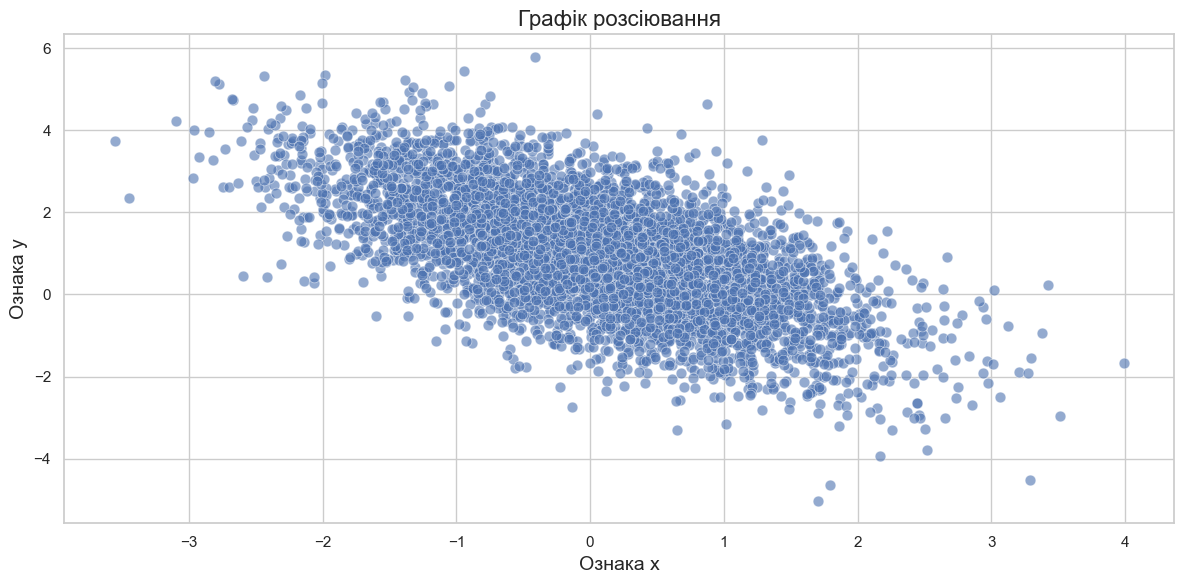

In [4]:
# 1. Візуалізація даних
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.scatterplot(x=x, y=y, color='b', alpha=0.6, s=60, edgecolor="w", linewidth=0.5)
plt.title('Графік розсіювання', fontsize=16)
plt.xlabel('Ознака x', fontsize=14)
plt.ylabel('Ознака y', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# 2. Побудова моделі лінійної регресії
X = sm.add_constant(x)  
model = sm.OLS(y, X).fit()  
a, b = model.params[1], model.params[0]  

print(f"Коефіцієнт нахилу (a): {a:.4f}")
print(f"Перехоплення (b): {b:.4f}")
print(f"Рівння: y={a:.4f}x + {b:.4f}")

Коефіцієнт нахилу (a): -0.9053
Перехоплення (b): 0.9979
Рівння: y=-0.9053x + 0.9979


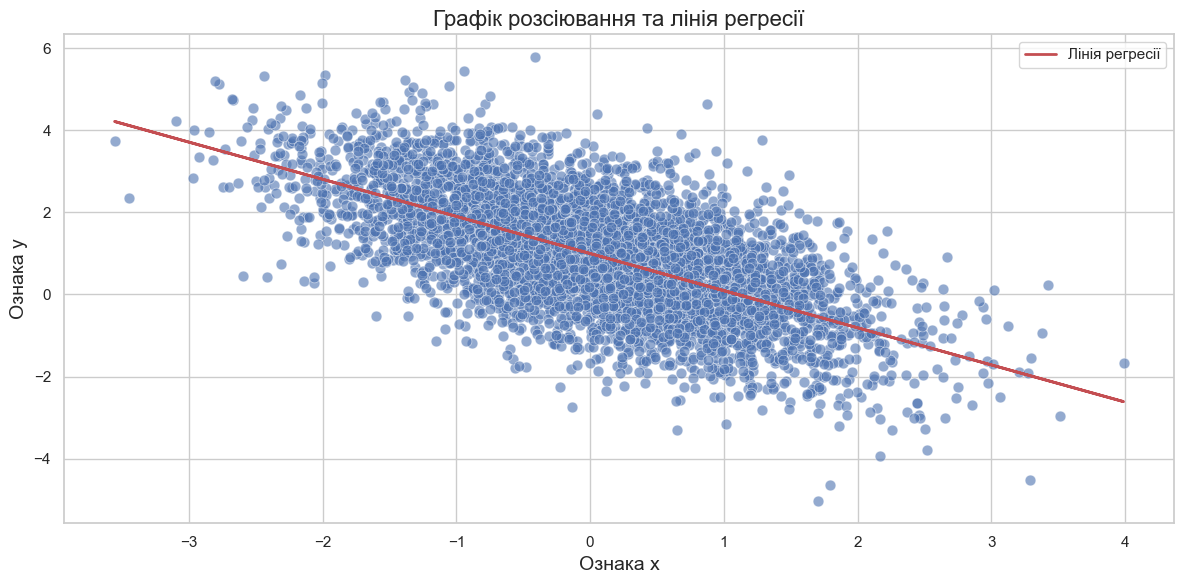

In [7]:
# 3. Візуалізація лінії регресії
plt.figure(figsize=(12, 6))
sns.scatterplot(x=x, y=y, color='b', alpha=0.6, s=60, edgecolor="w", linewidth=0.5)
plt.plot(x, a*x + b, color='r', lw=2, label='Лінія регресії')
plt.title('Графік розсіювання та лінія регресії', fontsize=16)
plt.xlabel('Ознака x', fontsize=14)
plt.ylabel('Ознака y', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()